In [42]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
#from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns
import adtk
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, QuantileAD, InterQuartileRangeAD, PersistAD, LevelShiftAD, VolatilityShiftAD
import re
import copy
import adtk

In [57]:
#Temperatur_sensor
data_jan_temp_buero = "../data/jans_smart_home/Arbeitszimmer_temperatur_sensor.csv"

# Lesen der Datei
df_data_jan_temp_buero = pd.read_csv(data_jan_temp_buero, header=None)

# Spalten umbenennen
df_data_jan_temp_buero.columns = ["Name", "Temperatur", "Datum"]

# Überprüfen des DataFrames
#display(df_data_jan_temp_buero)

df_data_jan_temp_buero["datetime"] = pd.to_datetime(df_data_jan_temp_buero["Datum"], errors="coerce")

#display(df_data_jan_temp_buero)

#Thermostat
data_jan_temp_buero = "../data/jans_smart_home/Arbeitszimmer_thermostat.csv"

# Lesen der Datei
df_data_jan_thermo_buero = pd.read_csv(data_jan_temp_buero, header=None)

# Spalten umbenennen
df_data_jan_thermo_buero.columns = ["Sensor", "Modus", "Datum", "Temperatur", "Unused1", "Unused2", "Unused3", "Zieltemperatur"]

# Überprüfen des DataFrames
display(df_data_jan_thermo_buero)

df_data_jan_thermo_buero["datetime"] = pd.to_datetime(df_data_jan_temp_buero["Datum"], errors="coerce")

display(df_data_jan_thermo_buero)


/tmp/ipykernel_2695/2738418011.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data_jan_temp_buero["datetime"] = pd.to_datetime(df_data_jan_temp_buero["Datum"], errors="coerce")


,Sensor,Modus,Datum,Temperatur,Unused1,Unused2,Unused3,Zieltemperatur
0,entity_id,state,last_changed,current_temperature,hvac_action,target_temp_high,target_temp_low,temperature
1,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:16:10.704Z,16,NaN,NaN,NaN,17.5
2,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:23:10.723Z,17,NaN,NaN,NaN,17.5
3,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:30:10.743Z,18,NaN,NaN,NaN,17.5
4,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:39:10.771Z,19,NaN,NaN,NaN,17.5
...,...,...,...,...,...,...,...,...
668,climate.eve_thermo_20ebp1701_thermostat_3,off,2024-12-09T11:58:50.013Z,22,NaN,NaN,NaN,17.5
669,climate.eve_thermo_20ebp1701_thermostat_3,off,2024-12-09T12:19:55.880Z,21,NaN,NaN,NaN,17.5
670,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-09T12:25:36.901Z,21,NaN,NaN,NaN,17.5
671,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-09T12:33:48.097Z,21,NaN,NaN,NaN,21.5


/tmp/ipykernel_2695/2738418011.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data_jan_thermo_buero["datetime"] = pd.to_datetime(df_data_jan_temp_buero["Datum"], errors="coerce")


,Sensor,Modus,Datum,Temperatur,Unused1,Unused2,Unused3,Zieltemperatur,datetime
0,entity_id,state,last_changed,current_temperature,hvac_action,target_temp_high,target_temp_low,temperature,NaT
1,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:16:10.704Z,16,NaN,NaN,NaN,17.5,2024-11-28 23:00:00+00:00
2,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:23:10.723Z,17,NaN,NaN,NaN,17.5,2024-11-29 00:00:00+00:00
3,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:30:10.743Z,18,NaN,NaN,NaN,17.5,2024-11-29 01:00:00+00:00
4,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:39:10.771Z,19,NaN,NaN,NaN,17.5,2024-11-29 02:00:00+00:00
...,...,...,...,...,...,...,...,...,...
668,climate.eve_thermo_20ebp1701_thermostat_3,off,2024-12-09T11:58:50.013Z,22,NaN,NaN,NaN,17.5,NaT
669,climate.eve_thermo_20ebp1701_thermostat_3,off,2024-12-09T12:19:55.880Z,21,NaN,NaN,NaN,17.5,NaT
670,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-09T12:25:36.901Z,21,NaN,NaN,NaN,17.5,NaT
671,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-09T12:33:48.097Z,21,NaN,NaN,NaN,21.5,NaT


In [ ]:
df_data = df_data_jan_temp_buero.copy()

# Sortiere die Daten nach Datum (optional, falls nicht schon sortiert)
df = df_data.sort_values(by="datetime")
df = df.dropna(subset=["datetime"])

df["Temperatur"] = pd.to_numeric(df["Temperatur"], errors="coerce")


df_data_jan_temp_buero_filtered = df[(df["Temperatur"] >= 0) & (df["Temperatur"] <= 30)]

# Thermostat
df_data = df_data_jan_thermo_buero.copy()

# Sortiere die Daten nach Datum (optional, falls nicht schon sortiert)
df = df_data.sort_values(by="datetime")
df = df.dropna(subset=["datetime"])

df["Zieltemperatur"] = pd.to_numeric(df["Zieltemperatur"], errors="coerce")


df_data_jan_thermo_buero_filtered = df[(df["Modus"] == "heat")]

,Sensor,Modus,Datum,Temperatur,Unused1,Unused2,Unused3,Zieltemperatur,datetime
1,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:16:10.704Z,16,NaN,NaN,NaN,17.5,2024-11-28 23:00:00+00:00
2,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:23:10.723Z,17,NaN,NaN,NaN,17.5,2024-11-29 00:00:00+00:00
3,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:30:10.743Z,18,NaN,NaN,NaN,17.5,2024-11-29 01:00:00+00:00
4,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:39:10.771Z,19,NaN,NaN,NaN,17.5,2024-11-29 02:00:00+00:00
5,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-11-29T05:49:10.803Z,20,NaN,NaN,NaN,17.5,2024-11-29 03:00:00+00:00
...,...,...,...,...,...,...,...,...,...
598,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-07T15:55:54.539Z,20,NaN,NaN,NaN,21.5,2024-12-09 10:41:24.369000+00:00
599,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-07T15:57:03.872Z,20,NaN,NaN,NaN,17.5,2024-12-09 10:56:24.313000+00:00
600,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-07T16:07:47.774Z,21,NaN,NaN,NaN,17.5,2024-12-09 11:00:40.031000+00:00
604,climate.eve_thermo_20ebp1701_thermostat_3,heat,2024-12-07T16:54:35.980Z,19.5,NaN,NaN,NaN,17.5,2024-12-09 12:00:39.821000+00:00


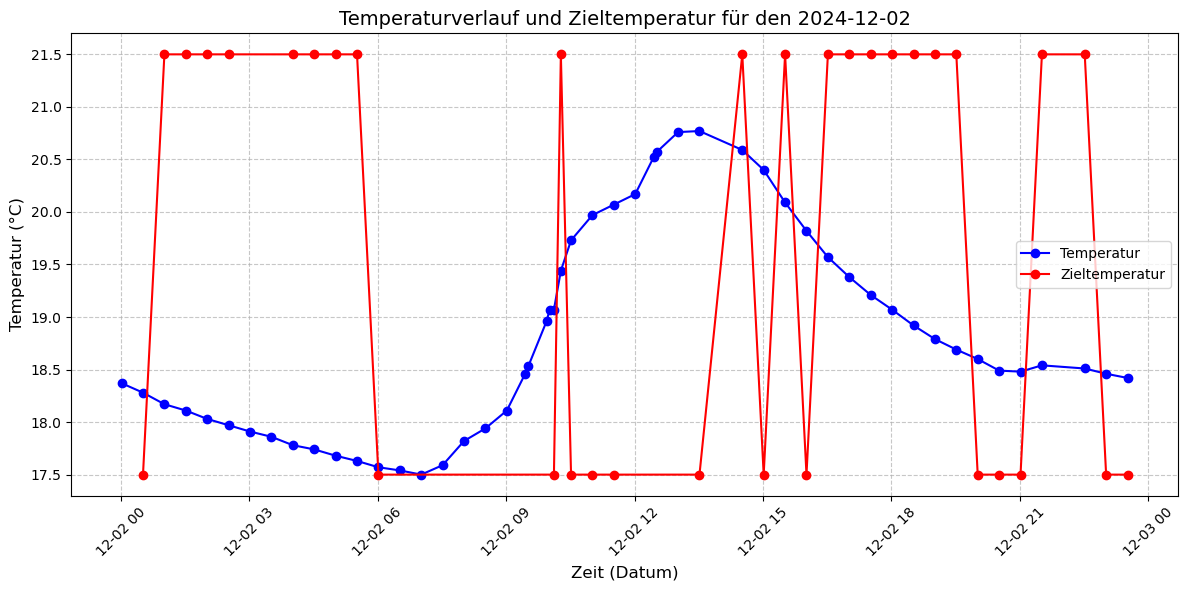

In [64]:

# Setze den Zeitraum auf einen bestimmten Tag (z.B. 2024-11-30)
start_time = "2024-12-02 00:00:00"
end_time = "2024-12-02 23:59:59"

# Filtern der Daten nach dem angegebenen Zeitraum
df_temp_filtered = df_data_jan_temp_buero_filtered.copy()
df_thermo_filtered = df_data_jan_thermo_buero_filtered.copy()

# Filter anwenden
df_temp_filtered["datetime"] = pd.to_datetime(df_temp_filtered["datetime"])
df_thermo_filtered["datetime"] = pd.to_datetime(df_thermo_filtered["datetime"])

df_temp_filtered = df_temp_filtered[(df_temp_filtered["datetime"] >= start_time) & (df_temp_filtered["datetime"] <= end_time)]
df_thermo_filtered = df_thermo_filtered[(df_thermo_filtered["datetime"] >= start_time) & (df_thermo_filtered["datetime"] <= end_time)]

# Plot erstellen
plt.figure(figsize=(12, 6))

# Temperatur-Daten plotten
plt.plot(df_temp_filtered["datetime"], df_temp_filtered["Temperatur"], marker="o", linestyle="-", color="blue", label="Temperatur")

# Zieltemperatur-Daten plotten
plt.plot(df_thermo_filtered["datetime"], df_thermo_filtered["Zieltemperatur"], marker="o", linestyle="-", color="red", label="Zieltemperatur")

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel("Zeit (Datum)", fontsize=12)
plt.ylabel("Temperatur (°C)", fontsize=12)
plt.title(f"Temperaturverlauf und Zieltemperatur für den {start_time.split(' ')[0]}", fontsize=14)

# Achsenformat anpassen
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()


In [46]:
# Kopieren des gefilterten DataFrames
df = df_data_jan_temp_buero_filtered.copy()

# Bereite die Daten als Zeitreihe vor
df_activity_train = df[["datetime", "Temperatur"]]
df_activity_train["datetime"] = pd.to_datetime(df_activity_train["datetime"])  # Stelle sicher, dass es ein datetime-Objekt ist
df_activity_train.set_index("datetime", inplace=True)  # Setze 'datetime' als Index

# ADTK benötigt eine Series, keine DataFrame
df_activity_train_series = validate_series(df_activity_train["Temperatur"])  # Validierung der Series
df_data_jan_temp_buero_filtered_2 = df_activity_train_series


/tmp/ipykernel_2695/4104629566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activity_train["datetime"] = pd.to_datetime(df_activity_train["datetime"])  # Stelle sicher, dass es ein datetime-Objekt ist


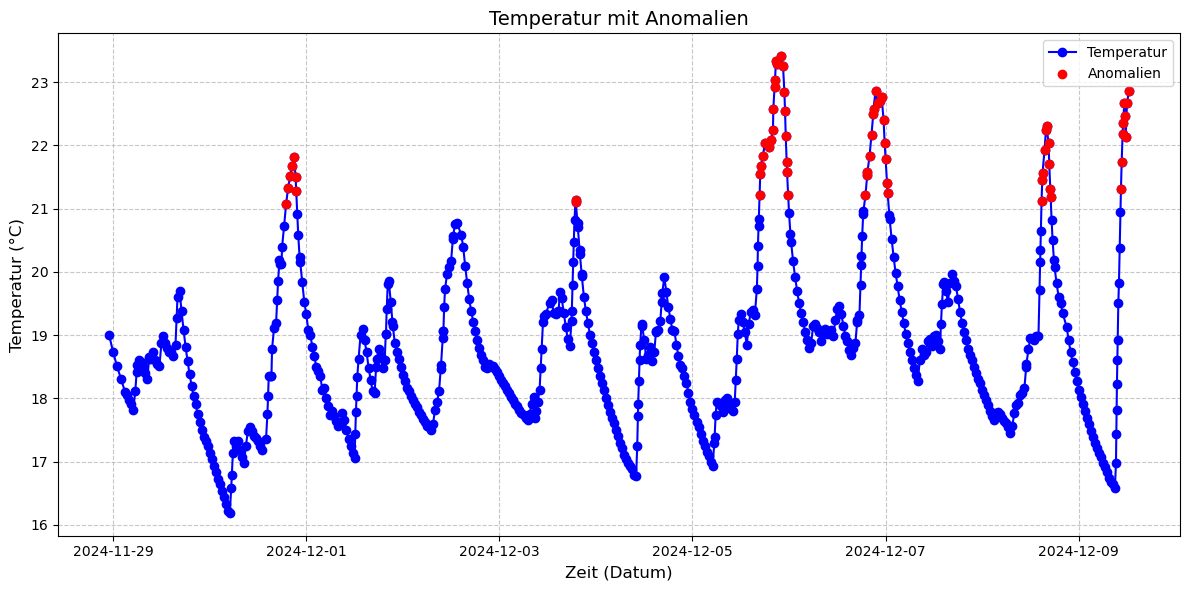

In [48]:
df = df_data_jan_temp_buero_filtered_2.copy()
# Anomalieerkennung mit ThresholdAD
threshold_ad = ThresholdAD(high=21, low=0)  # Definiere Schwellenwerte (z.B. 20 als Obergrenze, 0 als Untergrenze)
anomalies = threshold_ad.detect(df)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df, label="Temperatur", color="blue", linestyle="-", marker="o")
plt.scatter(
    anomalies.index[anomalies],
    df[anomalies],
    color="red",
    label="Anomalien",
    zorder=5,
)
plt.xlabel("Zeit (Datum)", fontsize=12)
plt.ylabel("Temperatur (°C)", fontsize=12)
plt.title("Temperatur mit Anomalien", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

[<Axes: >]

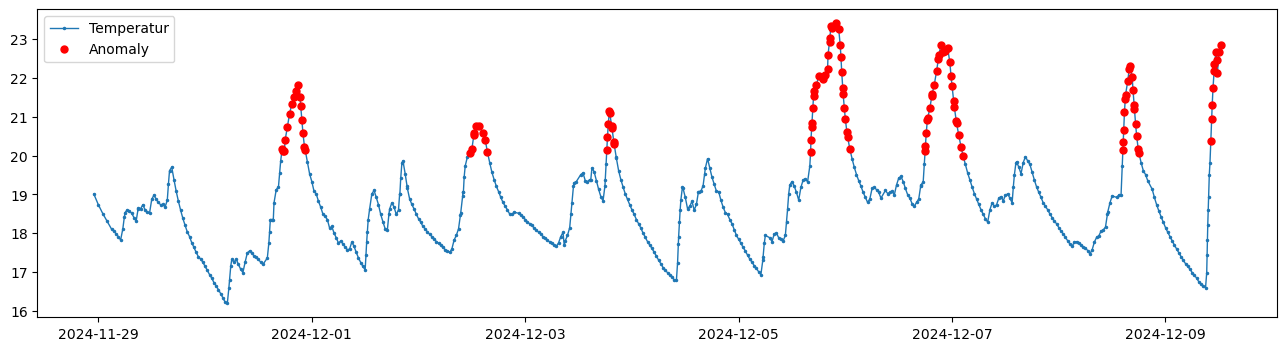

In [52]:
df = df_data_jan_temp_buero_filtered_2.copy()

quantile_ad = QuantileAD(high=0.80, low=0.00)
anomalies = quantile_ad.fit_detect(df)

plot(
    df,
    anomaly=anomalies,
    ts_linewidth=1,
    ts_markersize=3,
    anomaly_markersize=5,
    anomaly_color="red",
    anomaly_tag="marker",
)

[<Axes: >]

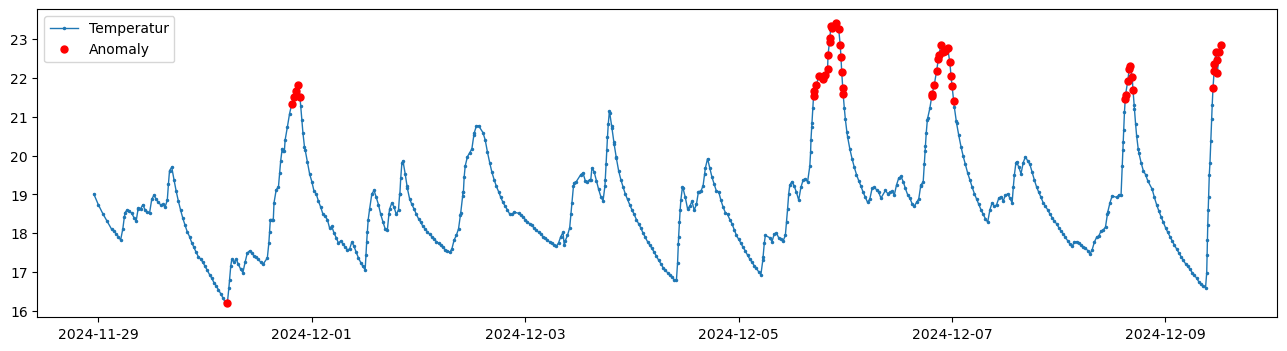

In [54]:
df = df_data_jan_temp_buero_filtered_2.copy()

iqr_ad = InterQuartileRangeAD(c=1.0)
anomalies = iqr_ad.fit_detect(df)

plot(
    df,
    anomaly=anomalies,
    ts_linewidth=1,
    ts_markersize=3,
    anomaly_markersize=5,
    anomaly_color="red",
    anomaly_tag="marker",
)